In [19]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
print("Uploaded:", file_path)

Saving Earthquake_dataset.csv to Earthquake_dataset (1).csv
Uploaded: Earthquake_dataset (1).csv


In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head(5)

Shape: (14698, 22)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2009-12-31T09:57:29.720Z,27.319,91.510,10.0,5.5,mb,205.0,37.4,NaN,0.89,...,2017-04-26T18:09:55.932Z,Bhutan,earthquake,NaN,NaN,NaN,118.0,reviewed,us,us
1,2009-12-29T13:33:22.870Z,35.017,73.005,63.8,4.0,mb,40.0,95.8,NaN,0.94,...,2014-11-07T01:40:19.294Z,northwestern Kashmir,earthquake,NaN,8.6,NaN,7.0,reviewed,us,us
2,2009-12-29T09:01:55.310Z,24.357,94.807,124.8,5.6,mwb,206.0,17.3,NaN,0.77,...,2016-11-10T02:22:03.905Z,Myanmar-India border region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,2009-12-28T02:15:04.870Z,30.686,83.769,10.0,4.4,mb,50.0,40.6,NaN,1.08,...,2014-11-07T01:40:19.031Z,western Xizang,earthquake,NaN,NaN,NaN,9.0,reviewed,us,us
4,2009-12-26T00:23:38.570Z,14.001,92.862,42.6,5.0,mb,117.0,68.1,NaN,0.82,...,2014-11-07T01:40:18.641Z,"Andaman Islands, India region",earthquake,NaN,5.7,NaN,56.0,reviewed,us,us


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14698 non-null  object 
 1   latitude         14698 non-null  float64
 2   longitude        14698 non-null  float64
 3   depth            14698 non-null  float64
 4   mag              14698 non-null  float64
 5   magType          14698 non-null  object 
 6   nst              11841 non-null  float64
 7   gap              12978 non-null  float64
 8   dmin             2694 non-null   float64
 9   rms              14691 non-null  float64
 10  net              14698 non-null  object 
 11  id               14698 non-null  object 
 12  updated          14698 non-null  object 
 13  place            14698 non-null  object 
 14  type             14698 non-null  object 
 15  horizontalError  2073 non-null   float64
 16  depthError       6755 non-null   float64
 17  magError    

In [22]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,14698.000000,14698.000000,14698.000000,14698.00000,11841.000000,12978.000000,2694.000000,14691.000000,2073.000000,6755.000000,2647.000000,13266.000000
mean,23.232205,84.788693,54.503866,4.38346,45.570307,120.561828,2.481249,0.930832,7.714134,11.096269,0.138383,14.629730
std,12.368081,10.296638,58.584940,0.49437,67.835233,55.755627,2.248574,0.251177,2.534278,9.233790,0.072427,24.271391
min,4.056300,67.677000,0.600000,2.90000,4.000000,10.000000,0.027000,0.020000,2.400000,0.000000,0.000000,1.000000
25%,9.479500,72.120250,13.300000,4.10000,14.000000,77.800000,0.797000,0.770000,6.100000,5.400000,0.084500,3.000000
50%,27.715050,91.318000,30.000000,4.40000,22.000000,109.000000,1.898500,0.920000,7.300000,8.500000,0.124000,6.000000
75%,35.439750,93.994000,62.700000,4.60000,44.000000,166.400000,3.431000,1.100000,8.900000,14.400000,0.175000,16.000000
max,37.171400,97.905400,400.570000,7.80000,728.000000,332.900000,33.178000,1.980000,23.400000,72.300000,0.539000,328.000000


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [24]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,2857
gap,1720
dmin,12004
rms,7


In [25]:
# Drop useless columns with >50% missing values
df = df.drop(columns=['dmin','horizontalError','depthError','magError'])

# Fill missing values with median
for col in ['nst','gap','rms','magNst']:
    df[col] = df[col].fillna(df[col].median())


In [26]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,rms,net,id,updated,place,type,magNst,status,locationSource,magSource
0,2009-12-31T09:57:29.720Z,27.319,91.510,10.0,5.5,mb,205.0,37.4,0.89,us,usp000h5j5,2017-04-26T18:09:55.932Z,Bhutan,earthquake,118.0,reviewed,us,us
1,2009-12-29T13:33:22.870Z,35.017,73.005,63.8,4.0,mb,40.0,95.8,0.94,us,usp000h5fh,2014-11-07T01:40:19.294Z,northwestern Kashmir,earthquake,7.0,reviewed,us,us
2,2009-12-29T09:01:55.310Z,24.357,94.807,124.8,5.6,mwb,206.0,17.3,0.77,us,usp000h5f4,2016-11-10T02:22:03.905Z,Myanmar-India border region,earthquake,6.0,reviewed,us,us
3,2009-12-28T02:15:04.870Z,30.686,83.769,10.0,4.4,mb,50.0,40.6,1.08,us,usp000h5e0,2014-11-07T01:40:19.031Z,western Xizang,earthquake,9.0,reviewed,us,us
4,2009-12-26T00:23:38.570Z,14.001,92.862,42.6,5.0,mb,117.0,68.1,0.82,us,usp000h5c9,2014-11-07T01:40:18.641Z,"Andaman Islands, India region",earthquake,56.0,reviewed,us,us


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            14698 non-null  object 
 1   latitude        14698 non-null  float64
 2   longitude       14698 non-null  float64
 3   depth           14698 non-null  float64
 4   mag             14698 non-null  float64
 5   magType         14698 non-null  object 
 6   nst             14698 non-null  float64
 7   gap             14698 non-null  float64
 8   rms             14698 non-null  float64
 9   net             14698 non-null  object 
 10  id              14698 non-null  object 
 11  updated         14698 non-null  object 
 12  place           14698 non-null  object 
 13  type            14698 non-null  object 
 14  magNst          14698 non-null  float64
 15  status          14698 non-null  object 
 16  locationSource  14698 non-null  object 
 17  magSource       14698 non-null 

In [11]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,rms,magNst
count,14698.000000,14698.000000,14698.000000,14698.00000,14698.000000,14698.000000,14698.000000,14698.000000
mean,23.232205,84.788693,54.503866,4.38346,40.988706,119.208831,0.930827,13.788951
std,12.368081,10.296638,58.584940,0.49437,61.596259,52.523245,0.251117,23.200232
min,4.056300,67.677000,0.600000,2.90000,4.000000,10.000000,0.020000,1.000000
25%,9.479500,72.120250,13.300000,4.10000,15.000000,82.300000,0.770000,3.000000
50%,27.715050,91.318000,30.000000,4.40000,22.000000,109.000000,0.920000,6.000000
75%,35.439750,93.994000,62.700000,4.60000,36.000000,156.000000,1.100000,14.000000
max,37.171400,97.905400,400.570000,7.80000,728.000000,332.900000,1.980000,328.000000


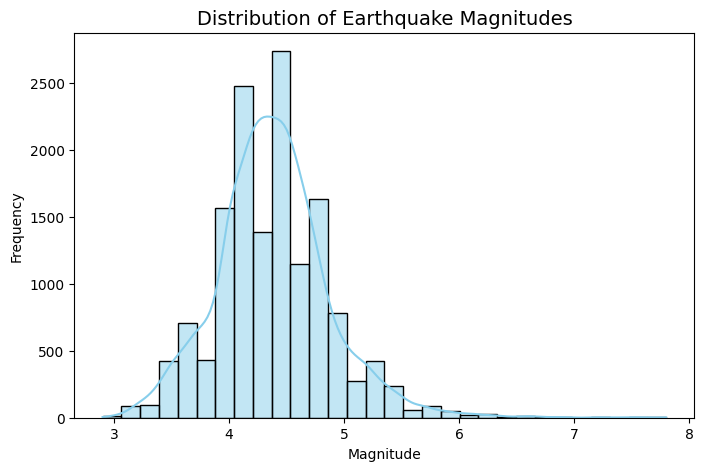

In [28]:
# 1. Distribution of Earthquake Magnitudes
plt.figure(figsize=(8,5))
sns.histplot(df['mag'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Earthquake Magnitudes", fontsize=14)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()





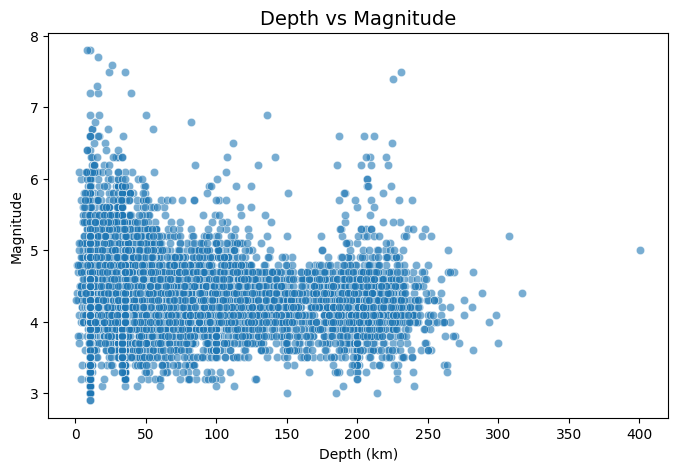

In [29]:
# 2. Depth vs Magnitude (Scatter plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='mag', data=df, alpha=0.6)
plt.title("Depth vs Magnitude", fontsize=14)
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

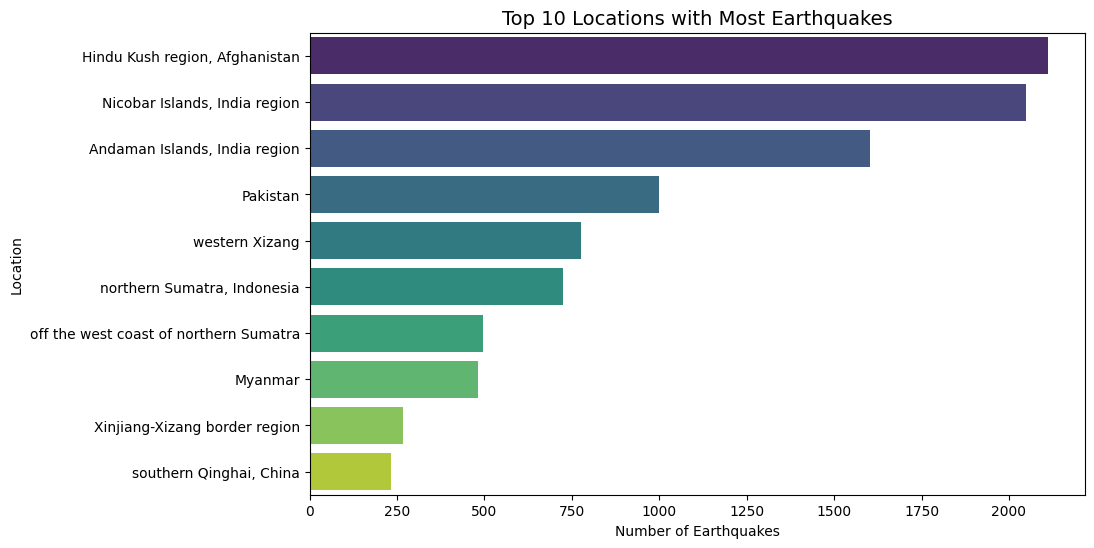

In [30]:
# 3. Top 10 Locations with Most Earthquakes
top_places = df['place'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_places.values, y=top_places.index, palette="viridis", hue=top_places.index, legend=False)
plt.title("Top 10 Locations with Most Earthquakes", fontsize=14)
plt.xlabel("Number of Earthquakes")
plt.ylabel("Location")
plt.show()

Feature Engineering - Create magnitude category


In [31]:


def categorize_magnitude(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    elif 6.0 <= mag < 7.0:
        return "Strong"
    elif 7.0 <= mag < 8.0:
        return "Major"
    else:
        return "Great"

df["mag_category"] = df["mag"].apply(categorize_magnitude)

# Check result
print(df[["mag", "mag_category"]].head(10))
print(df[["mag", "mag_category"]].tail(10))


   mag mag_category
0  5.5     Moderate
1  4.0     Moderate
2  5.6     Moderate
3  4.4     Moderate
4  5.0     Moderate
5  4.7     Moderate
6  4.6     Moderate
7  4.5     Moderate
8  4.2     Moderate
9  4.5     Moderate
       mag mag_category
14688  5.1     Moderate
14689  4.6     Moderate
14690  4.9     Moderate
14691  4.9     Moderate
14692  4.2     Moderate
14693  4.6     Moderate
14694  4.7     Moderate
14695  4.0     Moderate
14696  4.9     Moderate
14697  5.2     Moderate


Encoding columns

In [32]:

cat_cols = ["magType", "net", "place", "type", "status", "locationSource", "magSource", "mag_category"]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check result
print(df[cat_cols].head(5))


   magType  net  place  type  status  locationSource  magSource  mag_category
0        1    1   2345     0       1               4          7             2
1        1    1   2411     0       1               4          7             2
2        6    1   2373     0       1               4          7             2
3        1    1   2417     0       1               4          7             2
4        1    1   2336     0       1               4          7             2


Scaling numericals

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ["depth", "mag", "gap", "rms", "nst", "magNst"]

df[scale_cols] = scaler.fit_transform(df[scale_cols])

# ✅ Check result
print(df[scale_cols].head(5))
print(df[scale_cols].tail(5))


      depth       mag       gap       rms       nst    magNst
0 -0.759673  2.258588 -1.557627 -0.162588  2.662773  4.491964
1  0.158683 -0.775681 -0.445700  0.036529 -0.016052 -0.292634
2  1.199942  2.460872 -1.940328 -0.640469  2.679009 -0.335739
3 -0.759673  0.033457 -1.496699  0.594056  0.146301 -0.206425
4 -0.203197  1.247165 -0.973104 -0.441352  1.234067  1.819485
          depth       mag       gap       rms       nst    magNst
14693  0.856839  0.438026 -0.485684  0.713527  0.000183 -0.335739
14694 -0.332927  0.640311 -0.658946  0.633880 -0.227111 -0.421948
14695  0.203065 -0.775681  1.184110 -0.321882 -0.373229 -0.508157
14696 -0.006894  1.044880 -0.209606 -0.401529  0.276184  0.052202
14697 -0.759673  1.651734 -0.773186  0.633880  0.698301 -0.335739






Feature Selection

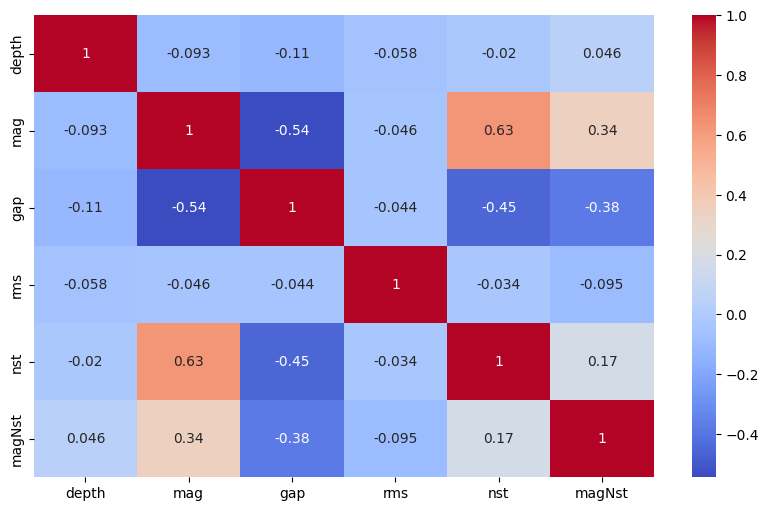

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df[scale_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


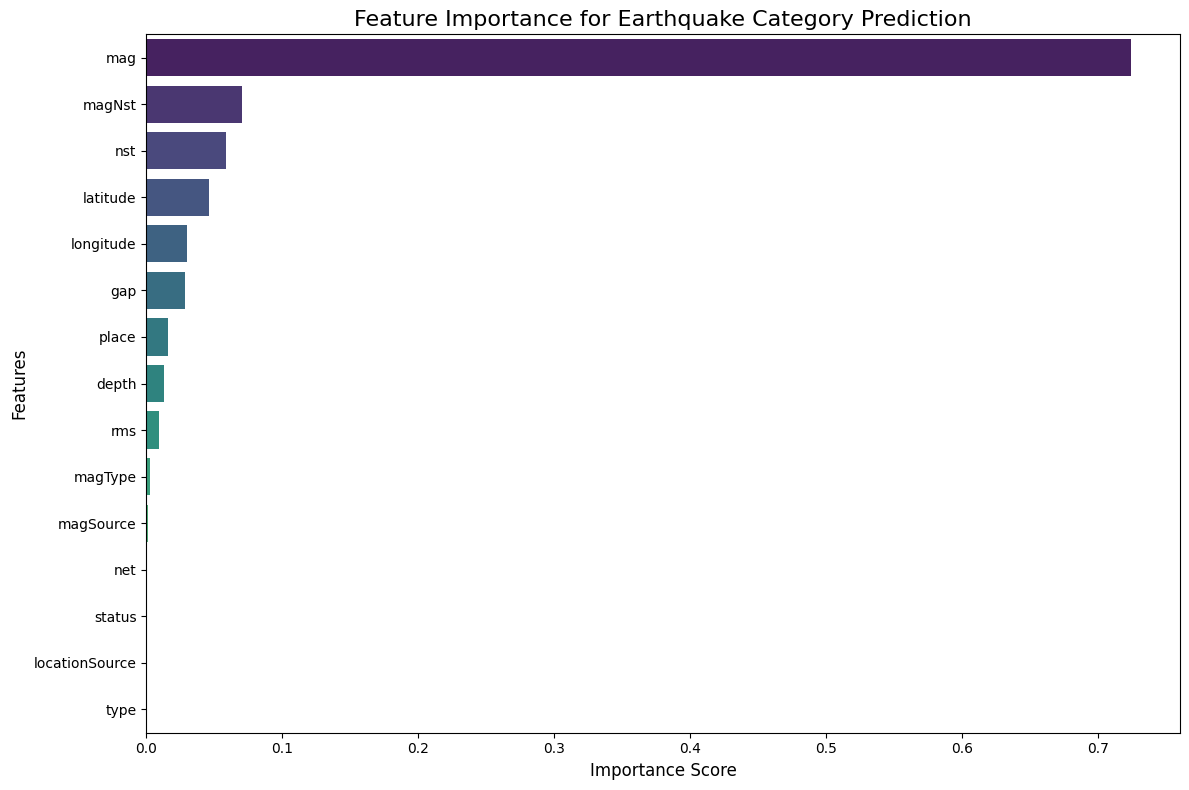

In [50]:


X = df.drop(columns=['time', 'id', 'updated', 'mag_category']) # Dropping original time, id, updated, and target column
y = df['mag_category']
# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Features': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=feature_importance_df, palette="viridis", hue='Features', legend=False)
plt.title("Feature Importance for Earthquake Category Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [49]:
print("\nTop 10 most important features:")
print(feature_importance_df.head(10))


Top 10 most important features:
     Features  Importance
3         mag    0.723758
11     magNst    0.070157
5         nst    0.058554
0    latitude    0.046166
1   longitude    0.030189
6         gap    0.028773
9       place    0.015697
2       depth    0.013003
7         rms    0.009291
4     magType    0.002792


Splitting data into training and testing sets

In [63]:
from sklearn.model_selection import train_test_split

# Select a smaller subset of the data (e.g., 50%)
df_subset = df.sample(frac=0.5, random_state=42)

# Select the top 3 features
X = df_subset[['mag', 'magNst', 'nst']]
y = df_subset['mag_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5879, 3)
X_test shape: (1470, 3)
y_train shape: (5879,)
y_test shape: (1470,)


In [65]:
df_subset.shape

(7349, 19)

Training Logistic Regression , Random forest , XGboast and KNN modesls




In [66]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000) # Increased max_iter for convergence

# Train the model
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [67]:


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [72]:


xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully!")

XGBoost model trained successfully!


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


Evaluating All Models (Combined)

In [75]:

# Evaluate Logistic Regression
y_pred_lr = log_reg_model.predict(X_test)
print("Logistic Regression Evaluation ")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\n Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\n XGBoost Evaluation ")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Evaluate KNN
y_pred_knn = knn_model.predict(X_test)
print("\n KNN Evaluation ")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Logistic Regression Evaluation 
Accuracy: 0.9965986394557823
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.00      0.00         1
           2       1.00      1.00      1.00      1232
           3       0.83      0.62      0.71         8

    accuracy                           1.00      1470
   macro avg       0.96      0.66      0.68      1470
weighted avg       1.00      1.00      1.00      1470

Confusion Matrix:
 [[ 228    0    1    0]
 [   0    0    0    1]
 [   0    0 1232    0]
 [   0    0    3    5]]

 Random Forest Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00      1232
           3       1.00      1.00      1.00         8

    accuracy                   

 Random Forest model to a file using joblib.
 RF has the highest accuracy along with the XgB model
 though i going with Random forest Moddel


In [81]:
import joblib

# Choose a filename for your model
filename = 'Earthquake_forecasting.pkl'

# Save the model using joblib
joblib.dump(rf_model, filename)

print(f"Random Forest model saved to {filename}")

Random Forest model saved to Earthquake_forecasting.pkl


In [83]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.3 MB/s eta 0:00:00


In [86]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained model
try:
    model = joblib.load('Earthquake_forecasting.pkl')
except FileNotFoundError:
    st.error("Model file not found. Please make sure 'Earthquake_forecasting.pkl' is in the same directory as the app or provide the full path.")
    st.stop()

st.title('Earthquake Category Prediction')

st.write("Enter the features to predict the earthquake category.")

# Add input fields for the features used in the model
# Based on your feature selection, these are 'mag', 'magNst', and 'nst'
mag = st.number_input('Magnitude (mag)', min_value=0.0, max_value=10.0, value=4.5)
magNst = st.number_input('Magnitude Station Count (magNst)', min_value=0.0, value=10.0)
nst = st.number_input('Station Count (nst)', min_value=0.0, value=20.0)


# Create a button to trigger prediction
if st.button('Predict Category'):
    # Create a DataFrame with the input features
    # The column names must match the features used during training
    input_data = pd.DataFrame([[mag, magNst, nst]], columns=['mag', 'magNst', 'nst'])

    # Make prediction using the processed input data
    prediction = model.predict(input_data)


    # Map the predicted category back to the original labels
    # Reconstructing mapping based on observations (0: Low, 1: Major, 2: Moderate, 3: Strong)
    category_mapping = {0: 'Low', 1: 'Major', 2: 'Moderate', 3: 'Strong'} # Reconstructed mapping based on observations


    predicted_category = category_mapping.get(prediction[0], 'Unknown')


    st.success(f'Predicted Earthquake Category: {predicted_category}')

Overwriting app.py
